In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [2]:
sb.set_palette('husl')
sb.set_style('darkgrid')

In [3]:
#sp=smart phones
sp=pd.read_csv('g://sp.csv')
sp

,Name,OS,Capacity,Ram,Weight,Company,inch
0,Galaxy S8,Android,64,4,149.0,Samsung,5.8
1,Lumia 950,windows,32,3,150.0,Microsoft,5.2
2,Xpreia L1,Android,16,2,180.0,Sony,5.5
3,iphone 7,ios,128,2,138.0,Apple,4.7
4,U Ultra,Android,64,4,170.0,HTC,5.7
5,Galaxy S5,Android,16,2,145.0,Samsung,5.1
6,iphone 5s,ios,32,1,112.0,Apple,4.0
7,Moto G5,Android,16,3,144.5,Motorola,5.0
8,Pixel,Android,128,4,143.0,Google,5.0
9,mi 9t,Android,128,6,180.0,xiaomi,6.2


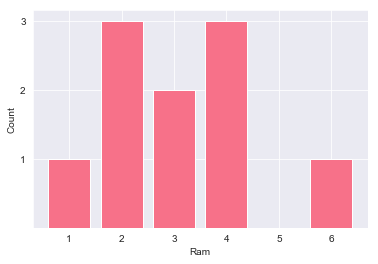

In [4]:
count = sp.Ram.value_counts()
category = count.index


plt.bar(category, count) 
plt.xlabel('Ram')
plt.ylabel('Count') 
plt.xticks([1, 2, 3, 4, 5, 6])
plt.yticks([1, 2, 3])
plt.show() 
#With bar charts, each column represents a group defined by a categorical variable;
#and with histograms, each column represents a group defined by a continuous, quantitative variable.
 

In [5]:
#ECDF -> Empirical cumulative distribution function
#تابع توزیع تجمعی تجربی

def ECDF(data):
        n = len(data)
        # Number of data point
        x = np.sort(data)
        # x-data for ECDF
        y= np.arange(1, n+1) / n
        # y-data for ECDF
        return x, y

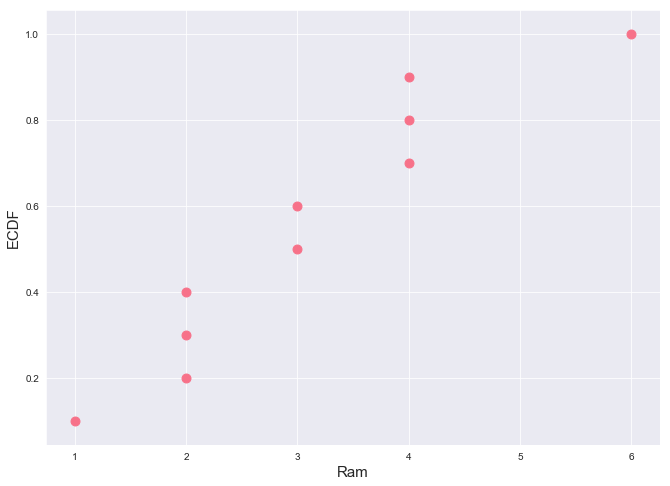

In [6]:
x, y = ECDF(sp.Ram)

plt.figure(figsize=(11, 8))
plt.scatter(x, y, s=80)
plt.margins(0.05)
plt.xlabel('Ram', fontsize=15)
plt.ylabel('ECDF', fontsize=15)
plt.show() 

In [7]:
np.percentile(sp.Ram,[25 ,50, 75])

array([2., 3., 4.])

In [8]:
#median
np.mean(sp.Ram)

3.1

In [9]:
#variance
np.var(sp.Ram)

1.89

In [10]:
#variance with the formula

diff = sp.Ram - np.mean(sp.Ram)
diff_sq = diff ** 2  #pow 2
var_exp = np.mean(diff_sq)
var_exp

1.89

In [11]:
# Standard Deviation
std=np.std(sp.Ram) 
std

1.374772708486752

In [12]:
#covariance 
np.cov(sp.inch, sp.Weight)

array([[3.86222222e-01, 1.14188889e+01],
       [1.14188889e+01, 4.31113889e+02]])

In [13]:
from scipy.stats.stats import pearsonr
pearson_coefficent, p_value = pearsonr(sp.Weight, sp.inch)

print(pearson_coefficent)
print(p_value)

0.8849305956778271
0.0006661185355121305


In [14]:
pearson_coefficent, p_value = pearsonr(sp.Capacity, sp.Ram)

print(pearson_coefficent)
print(p_value)

0.5583211840268644
0.09346614478192228


In [16]:
num_var = sp.drop(['Name','OS','Capacity', 'Ram', 'Company'], axis=1) 
print(num_var)
corr = num_var.corr()
corr

   Weight  inch
0   149.0   5.8
1   150.0   5.2
2   180.0   5.5
3   138.0   4.7
4   170.0   5.7
5   145.0   5.1
6   112.0   4.0
7   144.5   5.0
8   143.0   5.0
9   180.0   6.2


,Weight,inch
Weight,1.000000,0.884931
inch,0.884931,1.000000


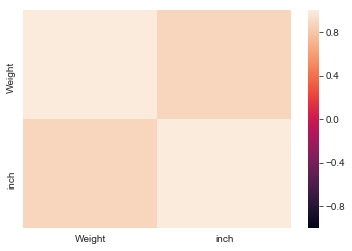

In [17]:
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1)
plt.show() 

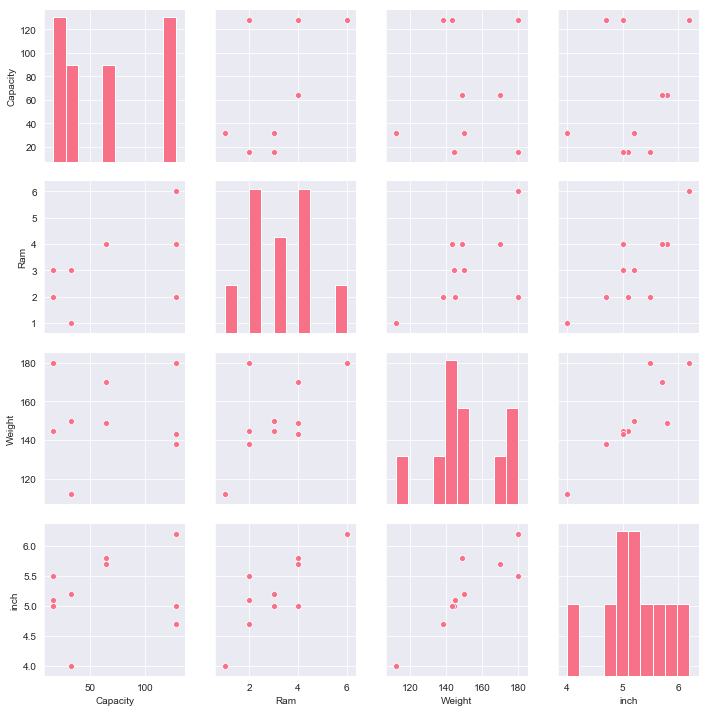

In [18]:
sb.pairplot(sp)
plt.show() 

In [24]:
cat_var = sp.drop(['Name','OS', 'Weight', 'inch','Company'], axis=1)
cat_var

,Capacity,Ram
0,64,4
1,32,3
2,16,2
3,128,2
4,64,4
5,16,2
6,32,1
7,16,3
8,128,4
9,128,6


In [25]:
from scipy.stats import spearmanr 

In [26]:
spearmanr_coefficent, p_value = spearmanr(cat_var.Capacity, cat_var.Ram)
print('spearman rank correlation is ', spearmanr_coefficent) 


spearman rank correlation is  0.5498420707162454


In [27]:
from scipy.stats import chi2_contingency

In [30]:
table = pd.crosstab(cat_var.Capacity, cat_var.Ram)
chi2, p_value, dof, expected = chi2_contingency(table.values)
print('chi2:')
print(chi2)
print('p_value:')
print(p_value)
print('dof:')
print(dof)
print('expected:')
print(expected) 

chi2:
15.833333333333334
p_value:
0.1989895180834219
dof:
12
expected:
[[0.3 0.9 0.6 0.9 0.3]
 [0.2 0.6 0.4 0.6 0.2]
 [0.2 0.6 0.4 0.6 0.2]
 [0.3 0.9 0.6 0.9 0.3]]


In [32]:
np.random.seed(42)
rand_num = np.random.random(3)   #randint(1,10)
win = rand_num < 0.5
print(win)
print(rand_num[win])

[ True False False]
[0.37454012]


In [34]:
num_trial = 1000
rand_num = np.random.random(size=num_trial)
win = rand_num > 0.5
num_win = np.sum(win)
print(num_win/num_trial)

0.497
